In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("/home/smee/docs/clgdocs/TY/SEM V/ML/DATASET/Social_Net_class.csv")

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
x = df[['Age', 'EstimatedSalary']]

In [6]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y = df[['Purchased']]

In [8]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [9]:
x.shape

(400, 2)

In [10]:
y.shape

(400, 1)

In [11]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 24)

In [21]:
x_train.shape

(300, 2)

In [22]:
x_test.shape

(100, 2)

In [23]:
y_train.shape

(300, 1)

In [24]:
y_test.shape

(100, 1)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model = KNeighborsClassifier()

In [27]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

/usr/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.86

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
model_sc = StandardScaler()

In [30]:
model_sc.fit(x_train, y_train)

StandardScaler()

In [31]:
x_train_scaled = model_sc.transform(x_train)

In [32]:
x_test_scaled = model_sc.transform(x_test)

In [33]:
model.fit(x_train_scaled, y_train)

/usr/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [34]:
model.score(x_test_scaled, y_test)

0.96

In [35]:
y_predict = model.predict(x_test_scaled)

In [36]:
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(y_test, y_predict)

In [39]:
cm

array([[67,  2],
       [ 2, 29]])

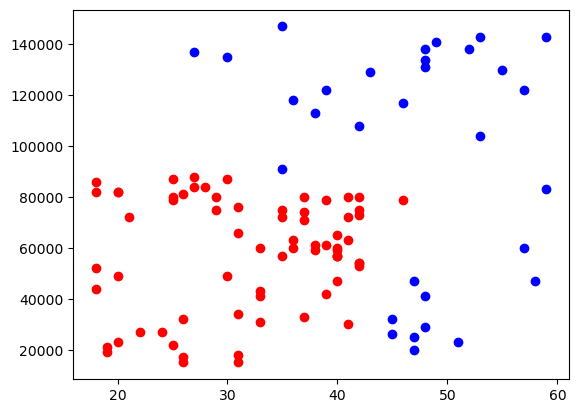

In [40]:
plt.scatter(x_test[y_predict == 0]['Age'], x_test[y_predict == 0]['EstimatedSalary'], c = 'r')
plt.scatter(x_test[y_predict == 1]['Age'], x_test[y_predict == 1]['EstimatedSalary'], c = 'b')

# Now we use SVM model

In [41]:
from sklearn.svm import SVC

In [42]:
model = SVC()

In [43]:
model.fit(x_train, y_train)

/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [44]:
model.score(x_test, y_test)

0.88

In [45]:
model.fit(x_train_scaled, y_train)

/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [46]:
e

0.96

In [47]:
y_predict_svc = model.predict(x_test_scaled)

In [48]:
y_predict_svc

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

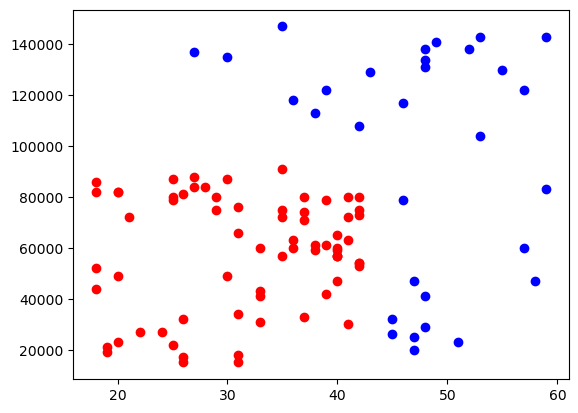

In [49]:
plt.scatter(x_test[y_predict_svc == 0]['Age'], 
            x_test[y_predict_svc == 0]['EstimatedSalary'], c = 'r')
plt.scatter(x_test[y_predict_svc == 1]['Age'], 
            x_test[y_predict_svc ==1 ]['EstimatedSalary'],c = 'b')

In [50]:
cm_svc = confusion_matrix(y_test, y_predict_svc)

In [51]:
cm_svc

array([[67,  2],
       [ 2, 29]])